# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



*Write your answer here*

In [1]:
#imports
import pandas as pd
import seaborn as sns
df = pd.read_csv('pet_supplies_2212.csv')
df.head()

#Dictionary for counting lost data
numberUnknown ={} 

In [2]:
#Cleaning Data

#Standardize the data
for column in df.columns:
    df = df.astype(str)
    df[column] = df[column].str.lower()
    df[column] = df[column].str.capitalize()

#Turn back to numerical data
toNumber = ['price', 'sales', 'rating','repeat_purchase']
for column in toNumber:
    df[column] = pd.to_numeric(df[column],errors='coerce')

#Turns missing data in categorical columns to Unknown
def toUnknown(df, list, column):
    filter = df[column].isin(list)
    numberUnknown[column] = len(df.loc[~filter,[column]])
    df.loc[~filter,[column]] = 'Unknown'

toUnknown(df, ['Housing','Food','Toys','Equipment','Medicine','Accessory'], 'category')
toUnknown(df, ['Dog', 'Cat', 'Fish', 'Bird'], 'animal')
toUnknown(df, ['Small', 'Medium', 'Large'], 'size')

#Turns missing data in numerical columns into appropriate numbers
for column in ['price','sales','rating','repeat_purchase']:
    numberUnknown[column] = df[column].isna().sum()
    if column == 'rating' or column == 'repeat_purchase':
        df[column] = df[column].fillna(0)
    else:
        df[column] = df[column].fillna(df[column].median())

#Print the number of Unknown for each column
print(numberUnknown)

df.head(30)

{'category': 25, 'animal': 0, 'size': 0, 'price': 150, 'sales': 0, 'rating': 150, 'repeat_purchase': 0}


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.100,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.980,963.60,6.0,0
2,3,Food,Dog,Medium,31.230,898.30,5.0,1
3,4,Medicine,Cat,Small,24.950,982.15,6.0,1
4,5,Housing,Cat,Small,26.180,832.63,7.0,1
5,6,Housing,Dog,Small,30.770,874.58,7.0,0
6,7,Housing,Dog,Small,31.040,875.07,5.0,0
7,8,Toys,Cat,Medium,28.900,1074.31,4.0,0
8,9,Equipment,Fish,Medium,17.820,503.67,5.0,0
9,10,Medicine,Dog,Medium,24.930,838.88,8.0,0


When analyzing the initial table, I realized that there was no standardization in the entries, so I transformed all the values into strings and then could standardize them, after this step, I transformed back the numerical values, generating NaN where there was no data. Next, I created a function to find the categorical data that was not correct and used a loop to clear the NaN values from the numerical data. During the data cleaning process, I made a count of the missing data and stored it in a dictionary, with the following values:

{'category': 25, 'animal': 0, 'size': 0, 'price': 150, 'sales': 0, 'rating': 150, 'repeat_purchase': 0}


## Task 2

_Write your answer here_

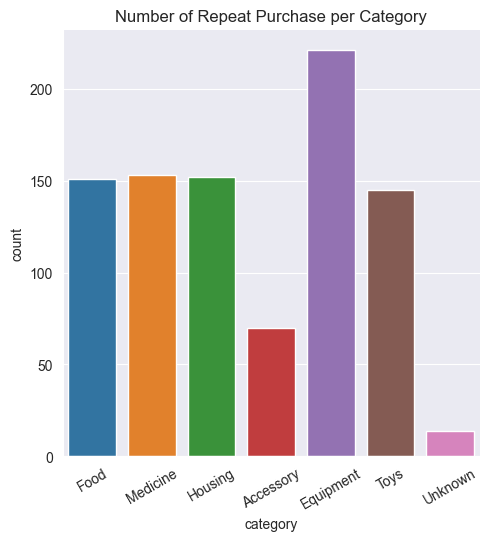

In [3]:
#filter dataframe only with repeat_purchase
df_repeat = df[df['repeat_purchase'] == 1]

#plot
sns.set_style('darkgrid')
plot1 = sns.catplot(data=df_repeat, x = 'category', kind='count')
plot1.set_xticklabels(rotation=30)

plot1.set(title = 'Number of Repeat Purchase per Category')

The category that has the largest buyback is equipment. Regarding the other categories, they have a similar amount of repurchases, except for accessories, which has a lower count.

## Task 3

[Text(0.5, 1.0, 'Distribution of Sales')]

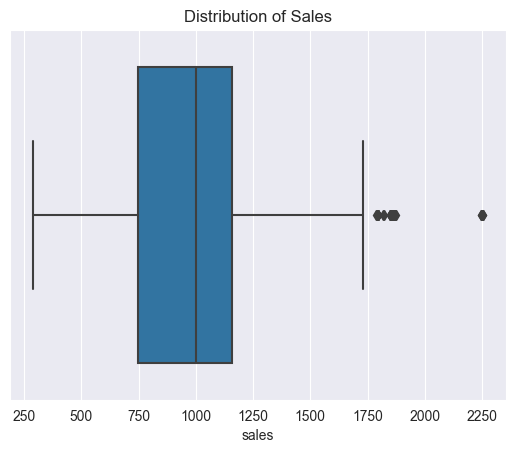

In [4]:
plot2= sns.boxplot(data = df, x = 'sales')
plot2.set(title= 'Distribution of Sales')

The median sales are around $1000, with most sales being between $750 and $1100. 

_Write your answer here_

## Task 4

[Text(0.5, 1.0, 'Relation between sales and repeat_purchase')]

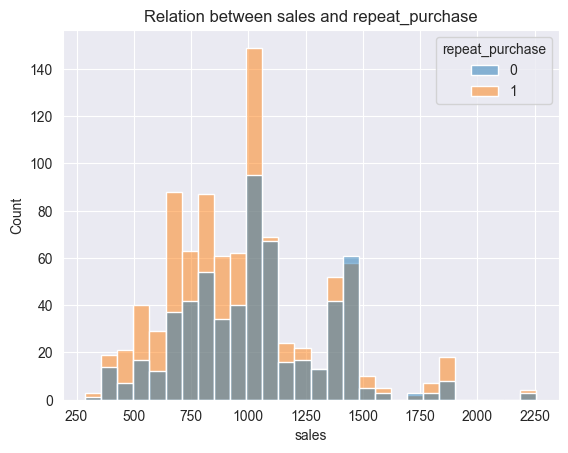

In [5]:
plot3 = sns.histplot(data = df, x = 'sales', hue= 'repeat_purchase')
plot3.set(title = 'Relation between sales and repeat_purchase')

Sales that have lower values have a higher repurchase proportion.

_Write your answer here_

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam